In [ ]:
!pip install tensorflow==2.6.0
import tensorflow as tf
print(tf.__version__)

In [ ]:
!pip install tensorflow==2.6.0 keras==2.6.0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import metrics

# 데이터 경로
train_dir = '/content/drive/MyDrive/dataset/train'
val_dir = '/content/drive/MyDrive/dataset/val'

# 이미지 크기 및 채널
img_size = (224, 224)
img_channel = 3

# 이미지 데이터 전처리
train_datagen = ImageDataGenerator(
    rescale=1./255)
    rotation_range=20,
    width_shift_range=0.2,
    brightness_range=(0.8,1.8),
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical') # categorical, binary, sparse 선택

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical') # categorical, binary, sparse 선택

# ResNet101 모델 불러오기
resnet = ResNet101(input_shape=(img_size[0], img_size[1], img_channel), weights='imagenet', include_top=False) # ImageNet으로 사전 학습된 가중치를 초기 가중치로 사용

# 새로운 분류층 추가
x = resnet.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
predictions = layers.Dense(16, activation='softmax')(x) # 클래스 개수만큼 조정

model = models.Model(inputs=resnet.input, outputs=predictions)

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 체크포인트를 저장할 경로
checkpoint_filepath = '/content/drive/MyDrive/checkpoints/model-{epoch:03d}.h5'

# 체크포인트 콜백 설정
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    save_best_only=False,
    save_weights_only=True,
    verbose=1)

# 모델 학습
history = model.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=100,
          validation_data=validation_generator,
          validation_steps=len(validation_generator),
          callbacks=[checkpoint_callback]) # 체크포인트 인자 추가

Found 9003 images belonging to 16 classes.
Found 2568 images belonging to 16 classes.
Epoch 1/100
563/563 [==============================] - ETA: 0s - loss: 0.2867 - accuracy: 0.9146 
Epoch 1: saving model to /content/drive/MyDrive/checkpoints/model-001.h5
563/563 [==============================] - 8717s 15s/step - loss: 0.2867 - accuracy: 0.9146 - val_loss: 14.4814 - val_accuracy: 0.0732
Epoch 2/100
563/563 [==============================] - ETA: 0s - loss: 0.0313 - accuracy: 0.9909
Epoch 2: saving model to /content/drive/MyDrive/checkpoints/model-002.h5
563/563 [==============================] - 303s 538ms/step - loss: 0.0313 - accuracy: 0.9909 - val_loss: 8.3834 - val_accuracy: 0.1145
Epoch 3/100
563/563 [==============================] - ETA: 0s - loss: 0.0244 - accuracy: 0.9923
Epoch 3: saving model to /content/drive/MyDrive/checkpoints/model-003.h5
563/563 [==============================] - 303s 538ms/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 4.4880e-04 - val_accuracy: 1

KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# 조기 종료 콜백 설정
early_stopping_callback = EarlyStopping(
    monitor='val_loss', # 검증 손실을 기준으로 조기 종료를 판단합니다.
    patience=5, # 검증 손실이 최소 5 에포크 동안 개선되지 않으면 학습을 중단합니다.
    restore_best_weights=True) # 가장 낮은 검증 손실을 가진 모델의 가중치를 복원합니다.

# 모델 학습
history = model.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=100,
          validation_data=validation_generator,
          validation_steps=len(validation_generator),
          callbacks=[checkpoint_callback, early_stopping_callback]) # EarlyStopping 콜백을 callbacks 인자에 추가합니다.

# 모델 학습 코드에 추가

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet101
from tensorflow.keras import layers, models
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import ModelCheckpoint

train_dir = '/content/drive/MyDrive/dataset/train'
val_dir = '/content/drive/MyDrive/dataset/val'

img_size = (224, 224)
img_channel = 3

train_datagen = ImageDataGenerator(
    rescale=1./255)
#    rotation_range=30,
#    width_shift_range=0.2,
#    zoom_range=0.2,
#    brightness_range=(0.8,1.8),
#    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical') # categorical, binary, sparse 선택

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical') # categorical, binary, sparse 선택

resnet = ResNet101(input_shape=(img_size[0], img_size[1], img_channel), weights=None, include_top=False) # 가중치 체크포인트 파일을 불러오므로 None으로 설정

x = resnet.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
predictions = layers.Dense(16, activation='softmax')(x) # 클래스 개수만큼 조정

model = models.Model(inputs=resnet.input, outputs=predictions)

# 이전에 저장된 모델 가중치 불러오기
model.load_weights('/content/drive/MyDrive/checkpoints/model-049.h5') # 경로 작성

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_filepath = '/content/drive/MyDrive/checkpoints/model-{epoch:03d}.h5'

checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    save_best_only=False,
    save_weights_only=True,
    verbose=1)

# 학습 이어서 시작
history = model.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=100,
          validation_data=validation_generator,
          validation_steps=len(validation_generator),
          callbacks=[checkpoint_callback],
          initial_epoch=49) # initial_epoch = 이전에 중단된 epoch 숫자

Found 9003 images belonging to 16 classes.
Found 2568 images belonging to 16 classes.
Epoch 50/100
563/563 [==============================] - ETA: 0s - loss: 5.6636e-07 - accuracy: 1.0000
Epoch 50: saving model to /content/drive/MyDrive/checkpoints/model-050.h5
563/563 [==============================] - 5715s 10s/step - loss: 5.6636e-07 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 0.9961
Epoch 51/100
563/563 [==============================] - ETA: 0s - loss: 7.7323e-08 - accuracy: 1.0000
Epoch 51: saving model to /content/drive/MyDrive/checkpoints/model-051.h5
563/563 [==============================] - 320s 568ms/step - loss: 7.7323e-08 - accuracy: 1.0000 - val_loss: 5.1153e-08 - val_accuracy: 1.0000
Epoch 52/100
563/563 [==============================] - ETA: 0s - loss: 0.0306 - accuracy: 0.9931
Epoch 52: saving model to /content/drive/MyDrive/checkpoints/model-052.h5
563/563 [==============================] - 320s 568ms/step - loss: 0.0306 - accuracy: 0.9931 - val_loss: 0.02

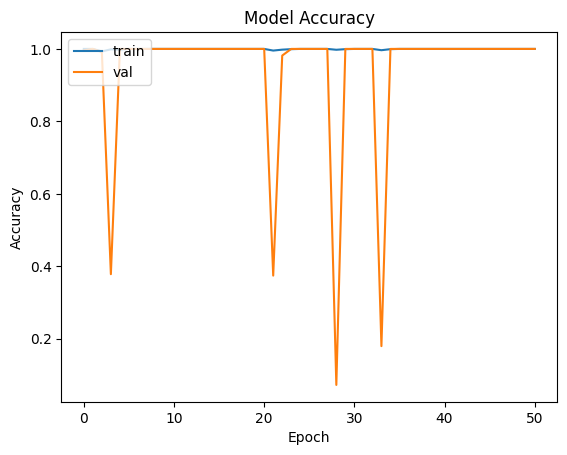

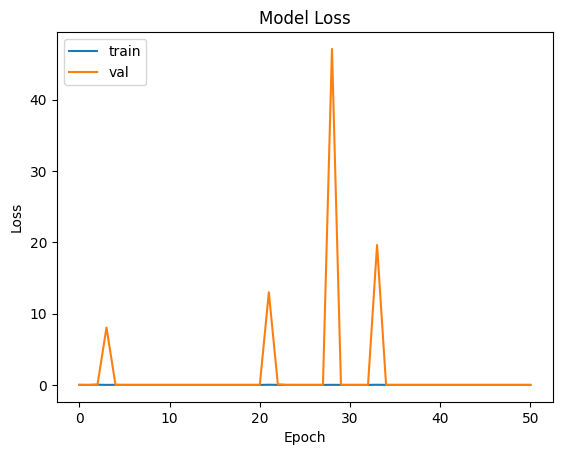

In [ ]:
import matplotlib.pyplot as plt

# 학습 곡선 그리기
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print('Validation Loss: {:.2f}, Validation Accuracy: {:.2f}%'.format(loss, accuracy*100))

1/1 [==============================] - 3s 3s/step - loss: 6273922.5000 - accuracy: 0.2000
Validation Loss: 6273922.50, Validation Accuracy: 20.00%


In [ ]:
# Colab 내부 가상 환경에 모델 저장
from tensorflow.keras.models import load_model

model.save('ResNet101_Practice.h5')

In [ ]:
# 구글 드라이브에 모델 저장
model.save('/content/drive/MyDrive/ResNet101_All.h5')